## Step 1: Reading and Understanding the Data
Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data


In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
bikesales=pd.read_csv("C:\\Users\\bhavit\\Desktop\\bike_sharing\\day.csv")

In [3]:
bikesales.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikesales.shape

(730, 16)

In [5]:
bikesales.season

0      1
1      1
2      1
3      1
4      1
      ..
725    1
726    1
727    1
728    1
729    1
Name: season, Length: 730, dtype: int64

## Step 2:  Data prepration to support model

In [6]:
# Convert numerical categorical values into actual categorical values as mentioned in dictionary


bikesales.season=bikesales.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

bikesales.weathersit=bikesales.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'})

bikesales.mnth = bikesales.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikesales.weekday = bikesales.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikesales.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Drop 'instant' as it is a record index.Also  'dteday'  as it is not any significant business relavant column
#Drop casual,registered as they are already counted in target variable
bikesales.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True) 

In [8]:
bikesales.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [76]:
bikesales.dtypes

instant         int64
dteday         object
season         object
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Step 3: Visualising the Data
Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to cnt.


In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

<Figure size 1080x2160 with 0 Axes>

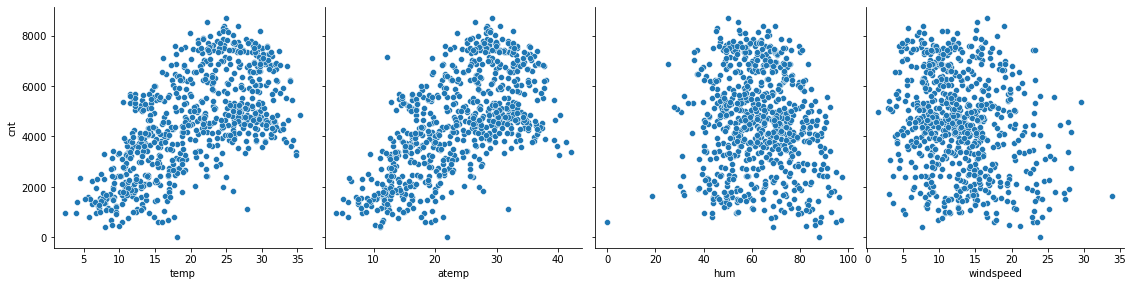

In [11]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikesales,x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()


In [12]:
bikesales.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


## Analysing Categorical Variabels with target variables

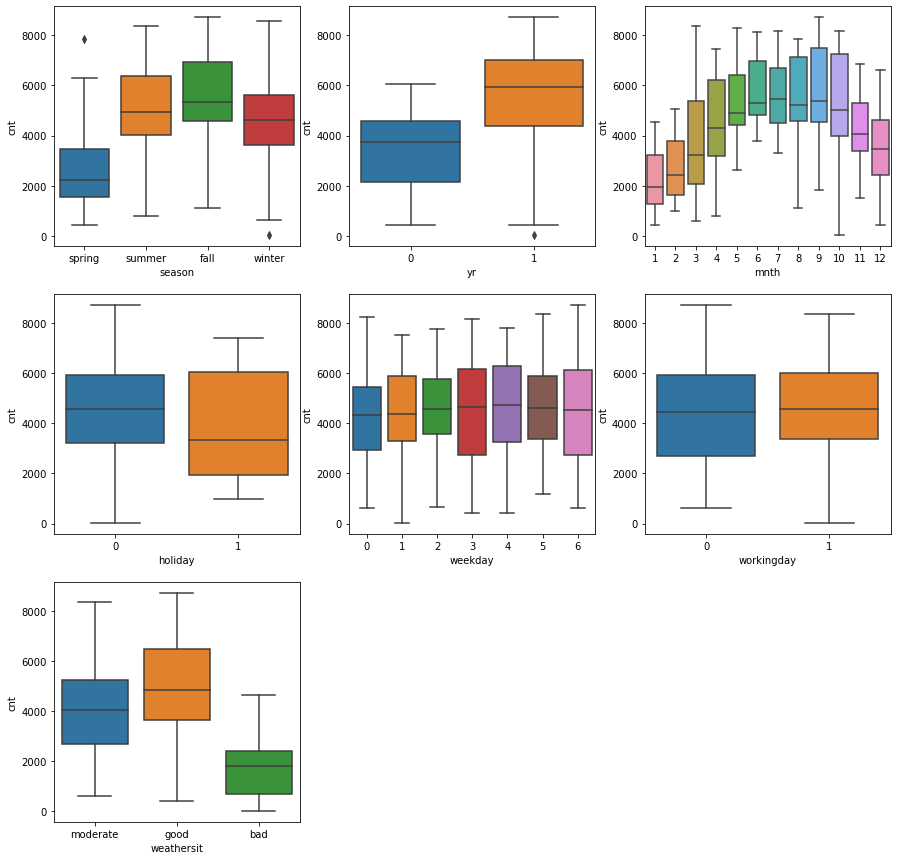

In [148]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikesales, x=i[1], y='cnt')
plt.show()

## Step 4 : convert categorical columns to numerical dummy columns to support model

In [13]:


one_hot_weekday = pd.get_dummies(bikesales["weekday"],prefix="weekday", drop_first=True)
one_hot_season = pd.get_dummies(bikesales["season"],prefix="season",drop_first=True)
one_hot_mnth = pd.get_dummies(bikesales["mnth"],prefix="mnth",drop_first=True)
one_hot_weathersit = pd.get_dummies(bikesales["weathersit"],prefix="weathersit",drop_first=True) 

bikesales_dummies = pd.concat([bikesales,one_hot_weekday,one_hot_season,one_hot_mnth,one_hot_weathersit], axis = 1)

bikesales_dummies.drop(['weekday','season','mnth','weathersit'], axis = 1, inplace = True) 

In [15]:
bikesales_dummies.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_mon,weekday_sat,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,1,0,0,0,0,0,0,0,1,0


In [16]:
bikesales_dummies.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_mon,weekday_sat,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_good,weathersit_moderate
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.143836,0.143836,...,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.634247,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.351164,0.351164,...,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.481971,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
bikesales_dummies.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

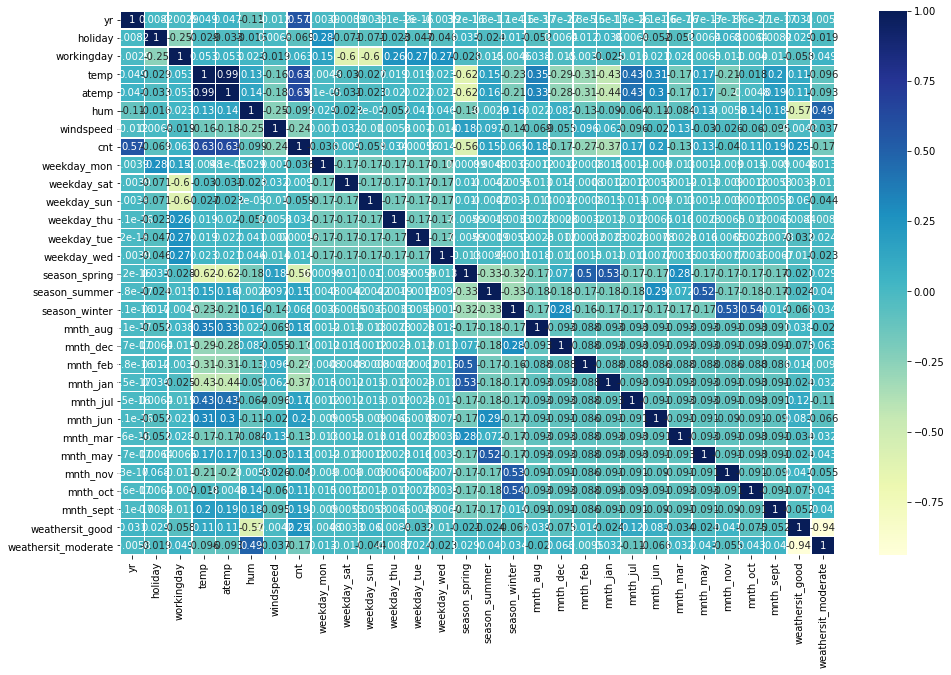

In [18]:
plt.figure(figsize = (16,10))
sns.heatmap(bikesales_dummies.corr(), cmap="YlGnBu", annot = True, linewidths=.5)
plt.show()

In [19]:
# If you see above temp and atemp are highly correlated 0.99 and temp seems to be good selection as feature. 
# so will drop atemp column.
bikesales_dummies.drop(['atemp'], axis = 1, inplace = True)

In [20]:
bikesales_dummies.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

## Step 5: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [97]:
#y to contain only target variable
y=bikesales_dummies.pop('cnt')

#X is all remainign variable also our independent variables
X=bikesales_dummies

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,weekday_mon,weekday_sat,weekday_sun,weekday_thu,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.00000,511.00000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,20.550310,63.482145,12.598001,0.148728,0.150685,0.152642,0.146771,...,0.088063,0.091977,0.084149,0.062622,0.091977,0.091977,0.09002,0.09002,0.624266,0.346380
std,0.500067,0.163398,0.470935,7.476797,13.939855,4.965253,0.356169,0.358092,0.359994,0.354224,...,0.283664,0.289276,0.277883,0.242520,0.289276,0.289276,0.28649,0.28649,0.484786,0.476282
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.079626,52.848700,9.041918,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,21.354153,64.041700,11.791732,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.940424,73.458300,15.583497,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,28.250014,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


In [99]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [101]:
# Build a Lienar Regression model using SKLearn for RFE
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [102]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [103]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 7),
 ('hum', False, 14),
 ('windspeed', False, 12),
 ('weekday_mon', False, 5),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 4),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 3),
 ('weekday_wed', False, 9),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', False, 6),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', False, 11),
 ('mnth_jul', True, 1),
 ('mnth_jun', True, 1),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

## Step 6: Building a linear model
Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [105]:
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [107]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'weekday_sat', 'season_spring',
       'mnth_dec', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sept', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [108]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['temp', 'hum', 'windspeed', 'weekday_mon', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_feb', 'mnth_jan'],
      dtype='object')

In [110]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_good', 'weathersit_moderate']]

## Build model 

In [112]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_good', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.52e-183
Time:                        15:25:46   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 308.0836    

## Model 2

In [113]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.59e-184
Time:                        15:27:36   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 296.7852    

## Model 3

In [114]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.46e-181
Time:                        15:29:02   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -951.0740    

## Model 4

In [117]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.56e-182
Time:                        15:34:39   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1014.6709    

## Model 5

In [118]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.57e-182
Time:                        15:36:32   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1087.3368    

## Model 6

In [120]:
# Dropping the variable weathersit_good as it has high vif
cols = ['yr', 'workingday','temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.51e-163
Time:                        15:40:16   Log-Likelihood:                -4191.6
No. Observations:                 511   AIC:                             8405.
Df Residuals:                     500   BIC:                             8452.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1046.2039    

## Model 7

In [130]:
# Dropping the variable windspeed as it has high vif # tried with temp as well but performance dastically dropped
cols = ['yr','temp', 'season_spring','season_summer', 'season_winter', 'mnth_sept', 'weekday_sat', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.87e-158
Time:                        15:46:48   Log-Likelihood:                -4208.7
No. Observations:                 511   AIC:                             8435.
Df Residuals:                     502   BIC:                             8473.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 667.3364    

## Model 8

In [143]:
# Dropping the variable weekday_sat as it has high p value
cols = ['yr','temp', 'holiday','season_spring','season_summer', 'season_winter', 'mnth_sept','weathersit_moderate']
build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     222.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.40e-159
Time:                        16:06:05   Log-Likelihood:                -4206.0
No. Observations:                 511   AIC:                             8430.
Df Residuals:                     502   BIC:                             8468.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 708.1649    

In [144]:
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

#Columns from our final model
cols = [ 'temp','holiday','yr','season_summer', 'weathersit_moderate','season_winter','season_spring','mnth_sept' ]

lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)
#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

708.1649198678424 [ 133.15415817 -592.55393355 2038.98372816  480.72237258 -560.90284366
  873.94564333 -653.23136898  725.49901416]


In [145]:
y_train_pred = lr.predict(X_train[cols])

In [146]:
#Print R-squared Value
from sklearn.metrics import r2_score
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.7798173997884894
0.7530732958122833


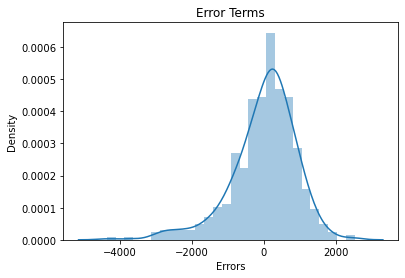

In [149]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')
    
plot_res_dist(y_train, y_train_pred)

## Errors are normally distribured here with mean 0. So everything seems to be fine


Text(0, 0.5, 'y_test_pred')

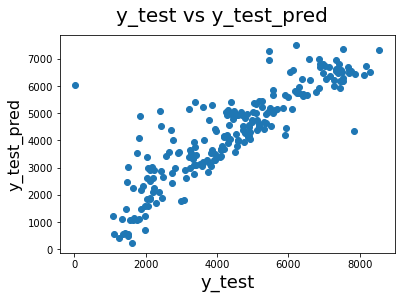

In [150]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)